In [3]:
!pip install scikit-learn
!pip install graphviz
!pip install pandas
!pip install matplotlib

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("Telco-Customer-Churn.partial.csv", header = 0)

In [16]:
data.head() #mostra le features e 5 righe di valori

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [17]:
data.info() #sommario dei tipi di dato, forma e occupazione in menoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [18]:
data.describe() #informazioni statistiche delle features

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [20]:
for i in data.columns: #trova quali sono i valori che compaiono in ogni colonna
    print(f"Unique {i}'s count: {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

Unique Churn's count: 2
['No' 'Yes']

Unique customerID's count: 5634
['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['No' 'Yes']

Unique Dependents's count: 2
['Yes' 'No']

Unique tenure's count: 73
[21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62]

Unique PhoneService's count: 2
['Yes' 'No']

Unique MultipleLines's count: 3
['No' 'Yes' 'No phone service']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['Yes' 'No' 'No internet service']

Unique OnlineBackup's count: 3
['No' 'Yes' 'No internet service']

Unique DeviceProtection's count: 3
['Yes' 'No' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No in

No     4128
Yes    1496
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Churn')

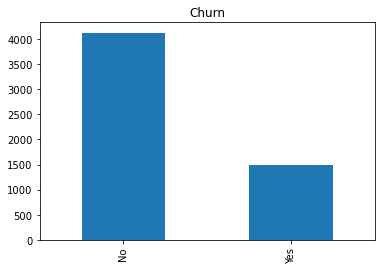

In [41]:
#grafico a barre delle istanze positive e negative
print(data.Churn.value_counts())
data["Churn"].value_counts().plot(kind="bar").set_title("Churn")

In [26]:
#trasformiamo TotalCharges da oggetto a float e tenure da int a float
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")
data["tenure"] = data["tenure"].astype(float)
data.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [28]:
data.isna().sum() # contiamo per ogni features quanti sono gli elementi mancanti

Churn                0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [30]:
#visto che esistono colonne con elementi mancanti le elimino
data = data.dropna()
#il codice del cliente sicuramente non è utile al fine della classificazione
data = data.drop(columns = "customerID")

In [48]:
from sklearn.model_selection import train_test_split
y = data["Churn"].values    # colonna "Churn"
x = data.drop(["Churn"], axis=1).values    # tutti i dati tranne la colonna "Churn".
train, test = train_test_split(data, random_state=42,test_size=0.25)    # divido i dati tra train e test set

#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)